In [192]:
# Preperation

try:
  from google.colab import drive
  drive.mount('/content/drive/')
  shared_drive_foldername = 'NUTRECON'
  root = '/content/drive/Shareddrives/{}/'.format(shared_drive_foldername)
  !pip install pandas==1.4.2
  print('Running Code in Colab')
except:
  root = 'D:/FV/Projects/NUTRECON/nutreconDrive/'
  print('Running Code locally')

import sys
sys.path.append(root + '1. Acquisition/notebooks')

from nutrecon import *

import numpy as np
from glob import glob
from datetime import datetime
import json

from random import shuffle, sample
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns

subject_nr = 1

_v_ = Vars()

experiment_code = _v_.experiment_code
dataPath = _v_.dataPath

neuroEcon_id = _v_.neuroEcon_id
responses_dataPath = _v_.responses_dataPath
#responses_dataPath = 'C:/Users/Admin/AppData/Roaming/Godot/app_userdata/nutrecon/responses/'


Running Code locally


In [197]:
neuroEcon_paths = glob('{}*{}*'.format(responses_dataPath,neuroEcon_id))


def load_all_responses(paths):
    for fpath in paths:
        file_df = pd.read_json(fpath)
        file_df['task start'] = fpath.split('.json')[0].split('_')[-1]
        if fpath == paths[0]:
            df = file_df
        else:
            df = pd.concat([df, file_df], ignore_index=True)

    return df

neurEcon_df = load_all_responses(neuroEcon_paths)

neurEcon_df.head()

,Day,Trial,Trial ID,Trial Type,User,block,choice,choiceStart_ms,choiceTime,choiceTime_ms,...,lottery type,optionTime,reference flavor,reference p,reference qt,reference shape,reference type,trialStartTimestamp,trialStart_ms,task start
0,day2,1,21,same,nutre001,0,2,49313,2250,50147,...,money,2000,,1.0,1.0,,money,1669375559,47371,1669379371
1,day2,2,50,same,nutre001,0,2,52917,2250,54018,...,C-,2000,cashew,1.0,20.0,hexagon,C-,1669375563,51034,1669379371
2,day2,3,18,same,nutre001,0,2,56771,2250,57055,...,money,2000,,1.0,1.0,,money,1669375567,54891,1669379371
3,day2,4,71,same,nutre001,0,1,59808,2250,60876,...,C-,2000,cashew,1.0,20.0,hexagon,C-,1669375570,57937,1669379371
4,day2,5,36,same,nutre001,0,1,63662,2250,64280,...,C+,2000,pomegranate,1.0,20.0,square,C+,1669375574,61796,1669379371


<AxesSubplot: xlabel='deltaOptionTime', ylabel='Count'>

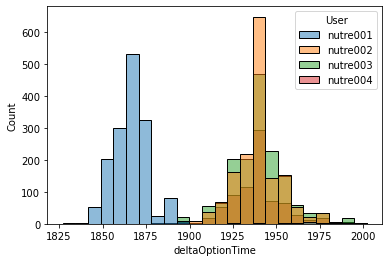

In [198]:
neurEcon_df['deltaOptionTime'] = neurEcon_df['choiceStart_ms'] - neurEcon_df['trialStart_ms']

#neurEcon_df = neurEcon_df[neurEcon_df['deltaOptionTime'] < 1000]

sns.histplot(data = neurEcon_df, x = 'deltaOptionTime', hue = 'User')

<AxesSubplot: xlabel='Trial', ylabel='deltaOptionTime'>

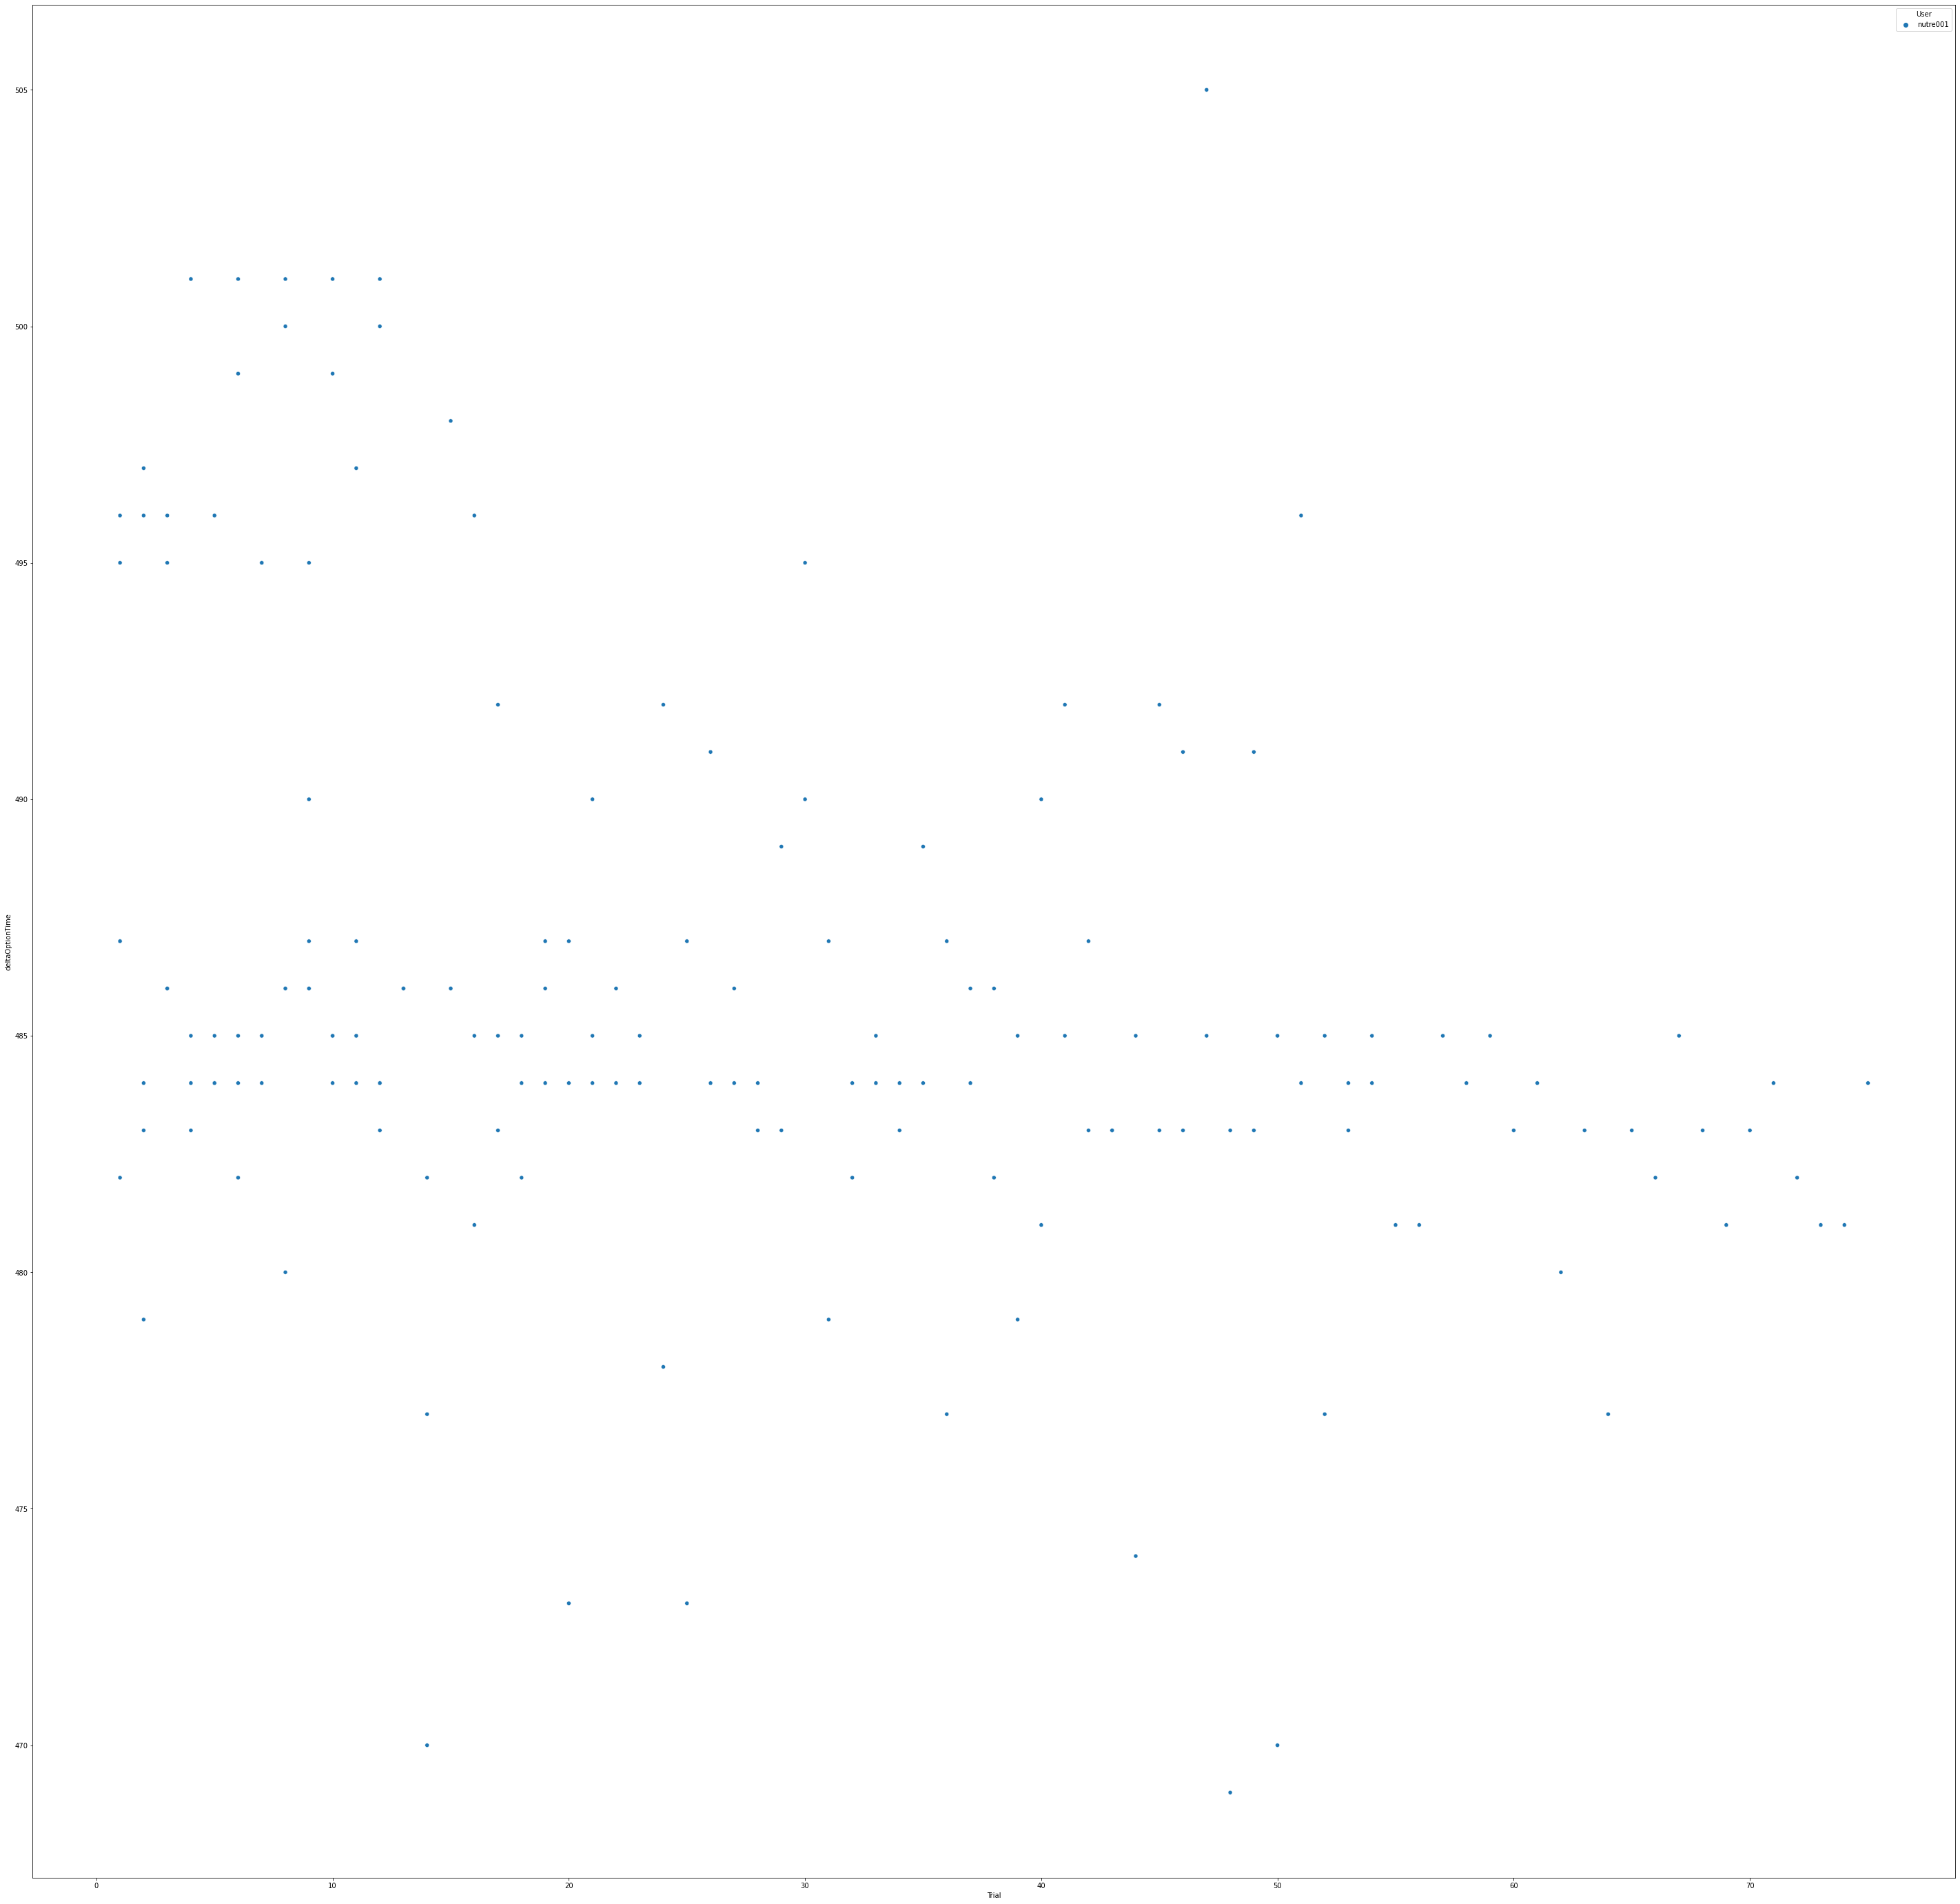

In [121]:
fig, ax = plt.subplots(figsize = (50,50))

sns.scatterplot(data = neurEcon_df, x = 'Trial', y = 'deltaOptionTime', hue = 'User', ax = ax)

<AxesSubplot: xlabel='trial', ylabel='165.02Hz'>

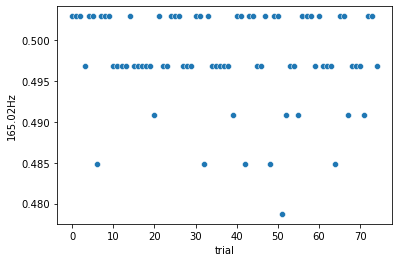

In [185]:
option_paths = 'D:/FV/GodotProjects/NUTRECON/nutrecon_day2/timestamps/option*'

for op_path in glob(option_paths):
    op_df_ = pd.read_json(op_path)
    op_df_['trial'] = op_path.split('.json')[0].split('_')[-1]
    if op_path == glob(option_paths)[0]:
        op_df = op_df_
    else:
        op_df = pd.concat([op_df, op_df_])

op_df.head()
op_df['trial'] =op_df['trial'].astype(float)
op_df_clean = op_df#.drop_duplicates()
op_df_clean_grouped = op_df_clean.groupby('trial').count()


op_df_clean_grouped['165.02Hz'] = op_df_clean_grouped['frame_start_ms'] * 1/165.02
op_df_clean_grouped.to_excel(root + 'option.xlsx')

sns.scatterplot(data = op_df_clean_grouped.reset_index(), x = 'trial',y = '165.02Hz')

In [186]:
def time_delta(group_df, col):
    timestamps = group_df[col].values
    return timestamps[-1] - timestamps[0]

op_timedelta = op_df_clean.groupby('trial').apply(lambda x: time_delta(x, 'frame_start_ms' ))

op_timedelta.describe()



count        75.000000
mean     478405.573333
std        6095.021564
min      460281.000000
25%      476661.000000
50%      478557.000000
75%      483838.000000
max      485628.000000
dtype: float64

In [177]:
op_df_clean

,frame_start_ms,trial
0,1671658159,0.0
1,1671658159,0.0
2,1671658159,0.0
3,1671658159,0.0
4,1671658159,0.0
...,...,...
25,1671658173,9.0
26,1671658173,9.0
27,1671658173,9.0
28,1671658173,9.0


<AxesSubplot: xlabel='trial', ylabel='0'>

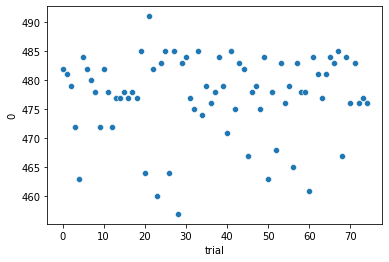

In [163]:
sns.scatterplot(data = op_timedelta.reset_index(), x = 'trial',y = 0)

<AxesSubplot: xlabel='trial', ylabel='165.02Hz'>

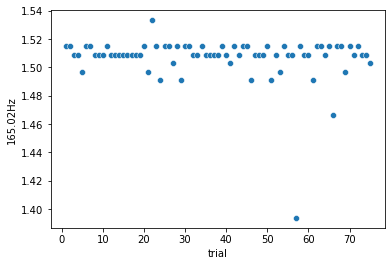

In [165]:
timestamp_paths = 'D:/FV/GodotProjects/NUTRECON/nutrecon_day2/timestamps/t*'

for ts_path in glob(timestamp_paths):
    ts_df_ = pd.read_json(ts_path)
    ts_df_['trial'] = ts_path.split('.json')[0].split('_')[-1]
    if ts_path == glob(timestamp_paths)[0]:
        ts_df = ts_df_
    else:
        ts_df = pd.concat([ts_df, ts_df_])

ts_df.head()
ts_df['trial'] = ts_df['trial'].astype(float)
ts_df_clean = ts_df #.drop_duplicates()
ts_df_clean_grouped = ts_df_clean.groupby('trial').count()

ts_df_clean_grouped['60Hz'] = ts_df_clean_grouped['frame_start_ms'] * 1/60
ts_df_clean_grouped['165.02Hz'] = ts_df_clean_grouped['frame_start_ms'] * 1/165.02
ts_df_clean_grouped.to_excel(root + 'timestamp.xlsx')

sns.scatterplot(data = ts_df_clean_grouped.reset_index(), x = 'trial',y = '165.02Hz')

In [ ]:
ts_df_clean_grouped.reset_index()